In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# data.info()

In [4]:
data[data.columns[data.isna().any() == True]].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Remove features with most None
data = data[[c for c in data.columns if c not in ('Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature')]]

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

### Analize the features that left on their influence on the Price

In [14]:
plot_data = data.dropna()

In [7]:
num_features = ('MSSubClass', 'LotFrontage', 'LotArea', 
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold')
cat_features =('MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 
       'GarageFinish','GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition')

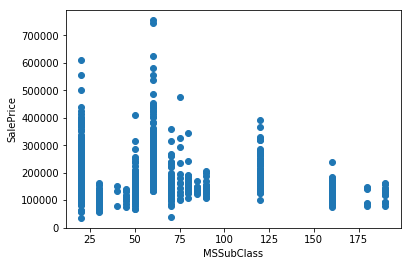

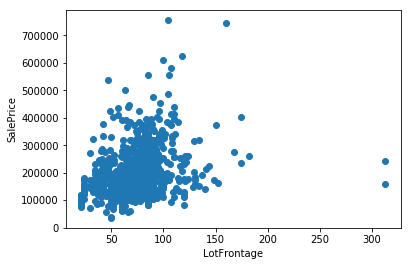

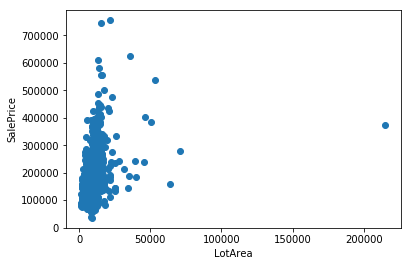

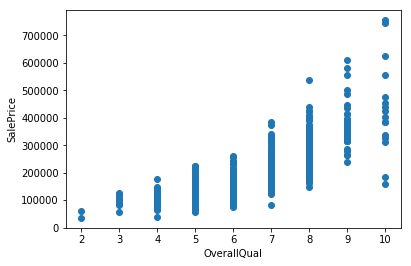

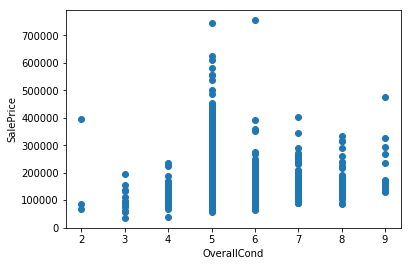

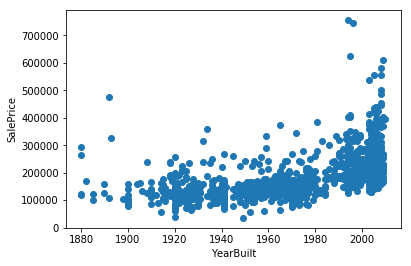

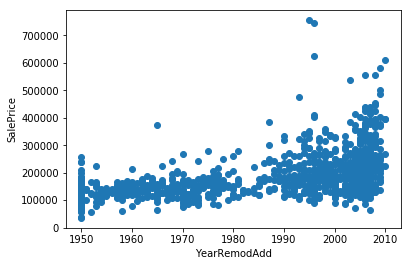

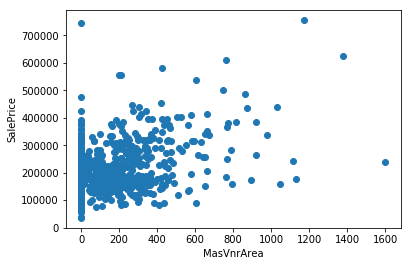

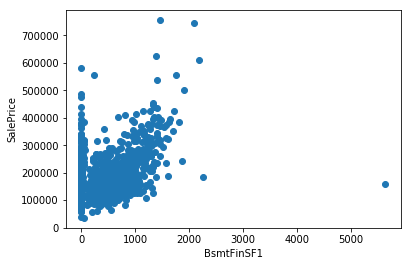

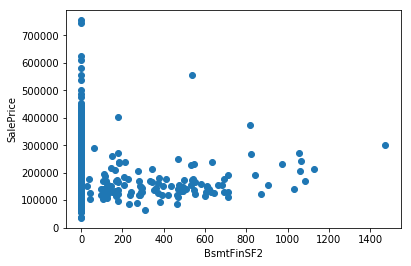

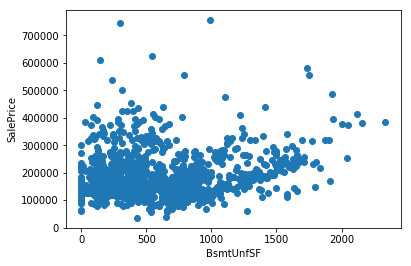

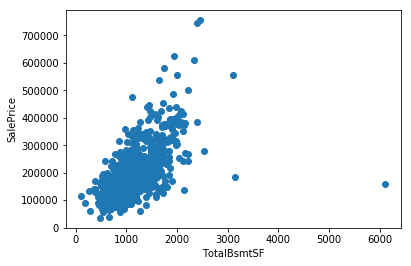

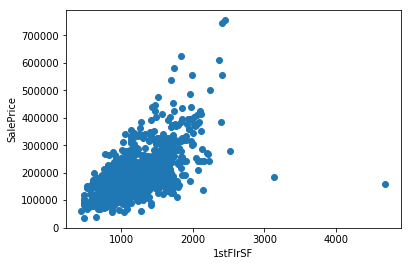

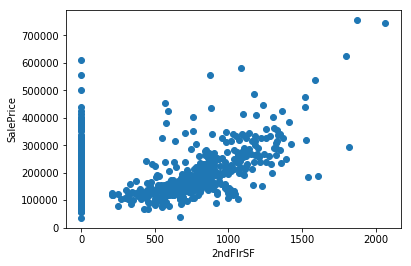

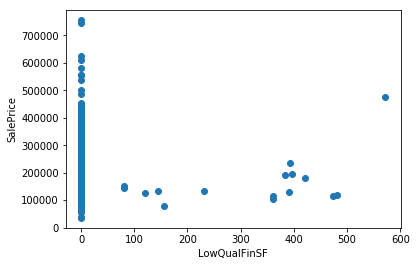

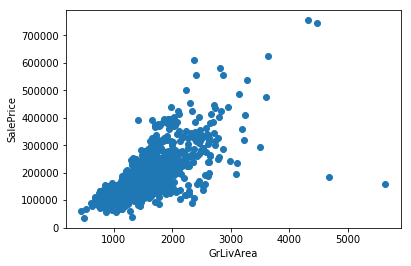

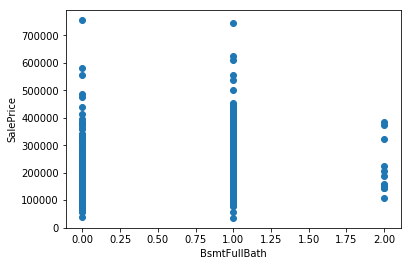

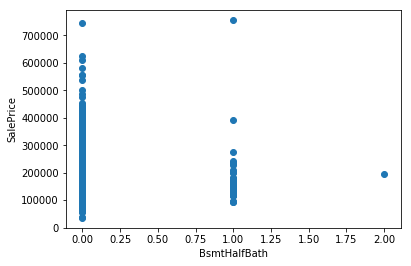

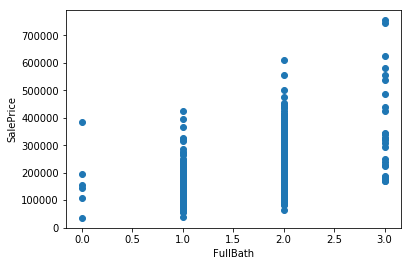

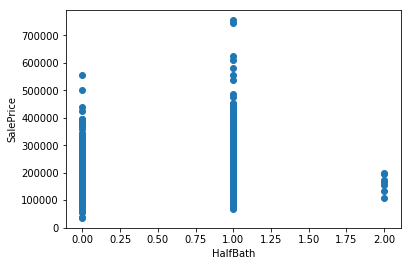

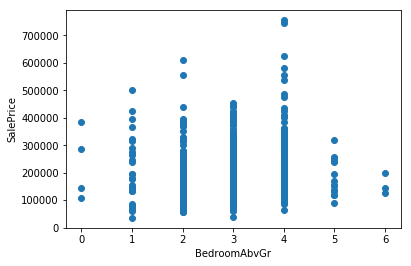

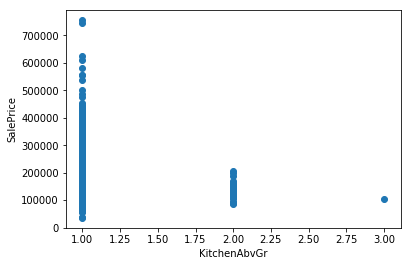

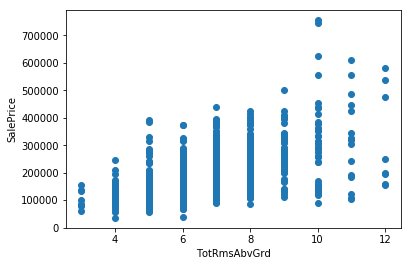

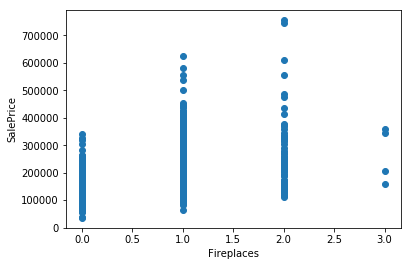

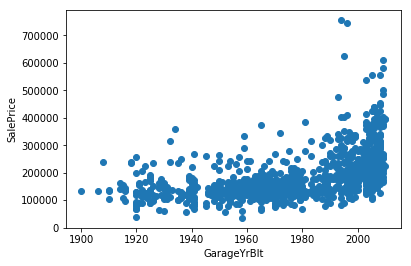

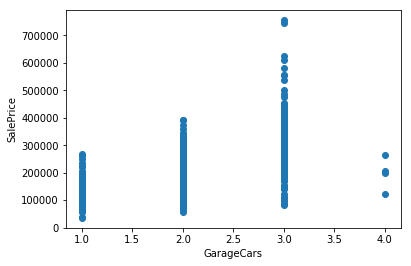

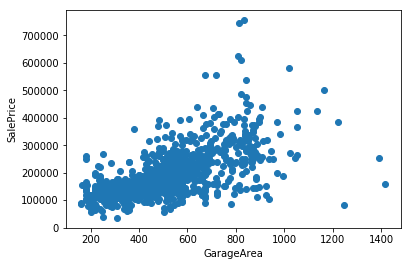

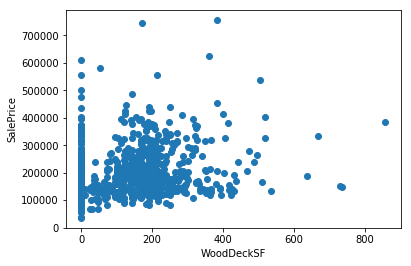

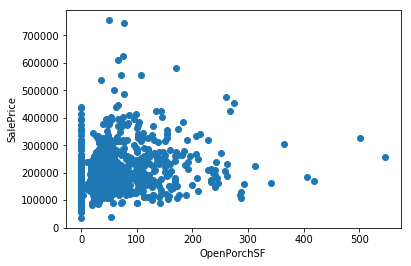

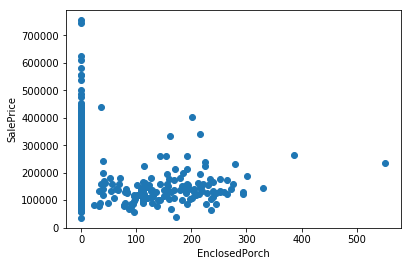

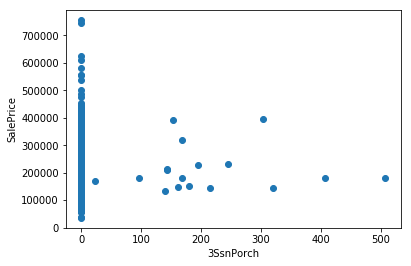

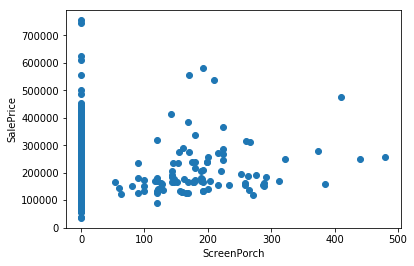

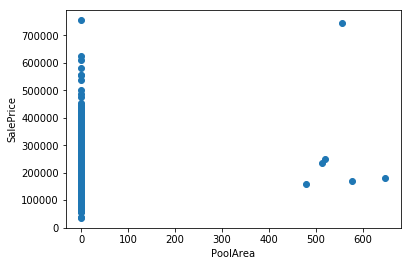

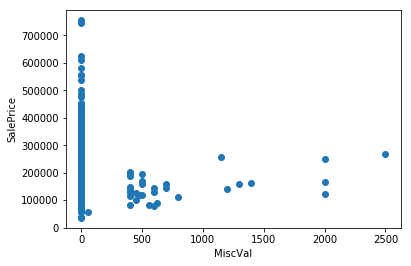

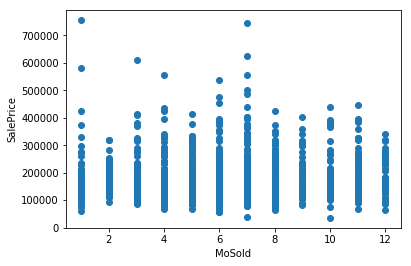

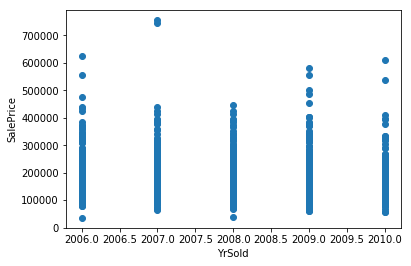

In [21]:
for col in num_features:
    plt.scatter(x=plot_data[col].values, y=plot_data.SalePrice)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

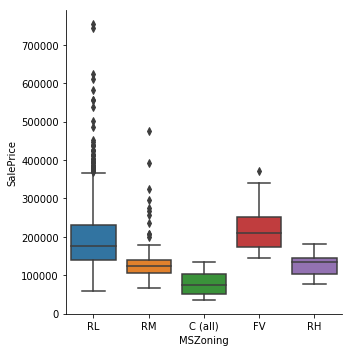

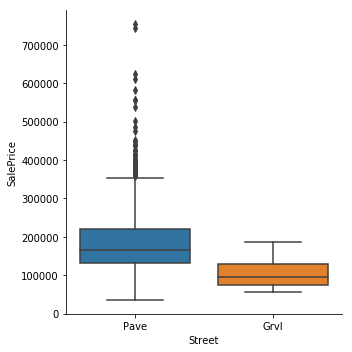

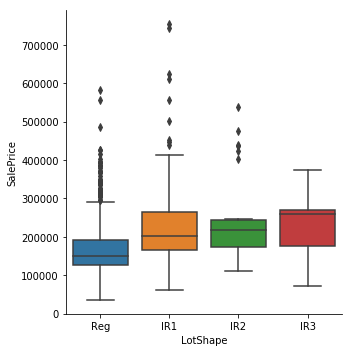

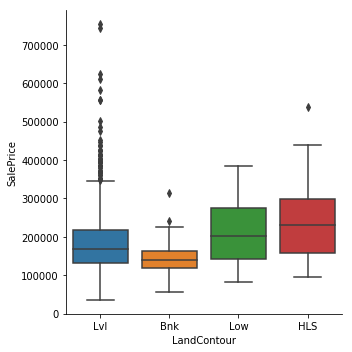

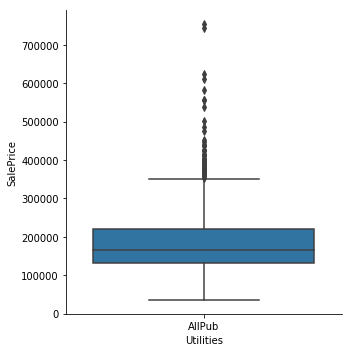

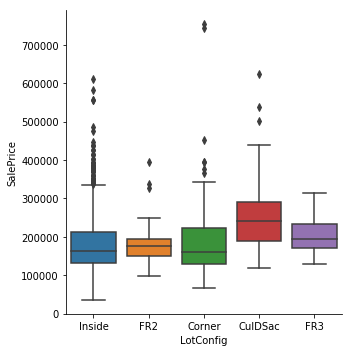

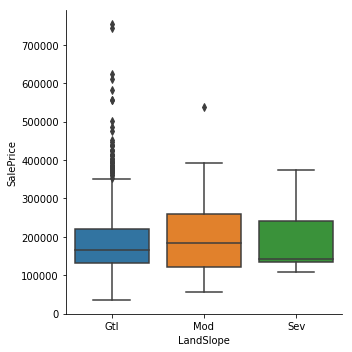

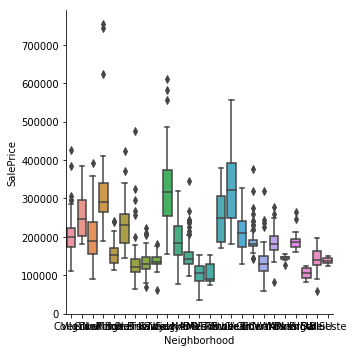

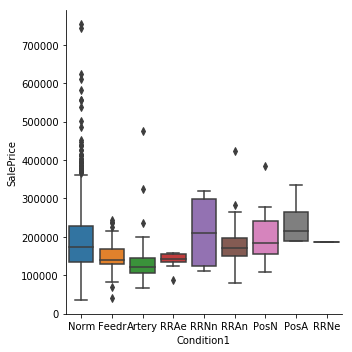

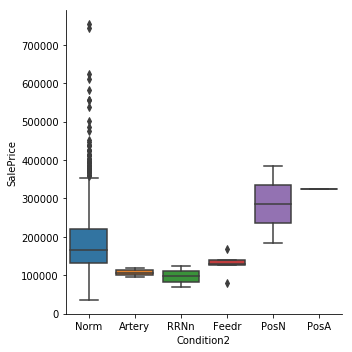

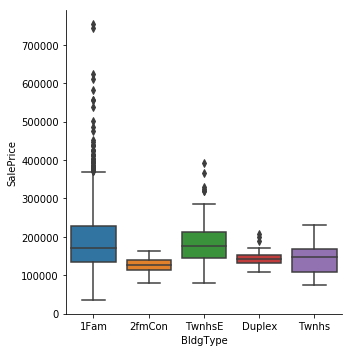

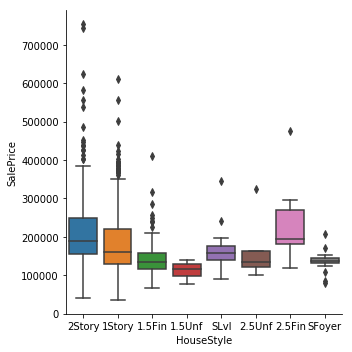

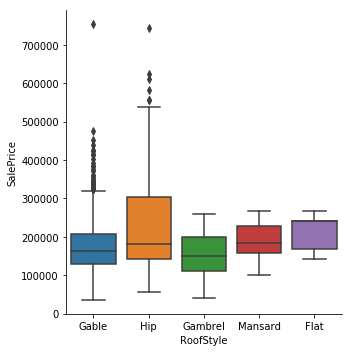

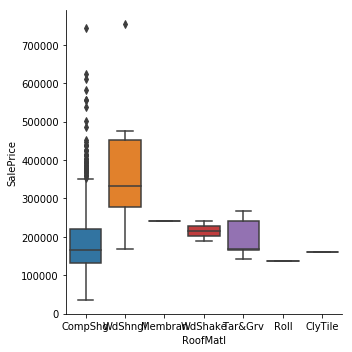

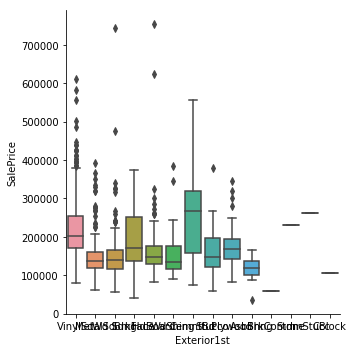

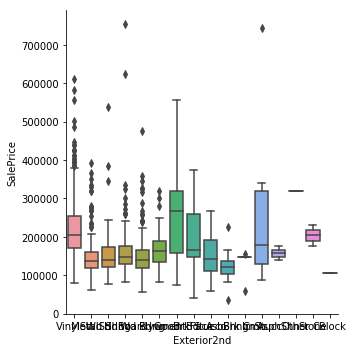

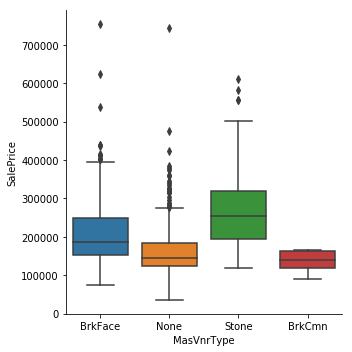

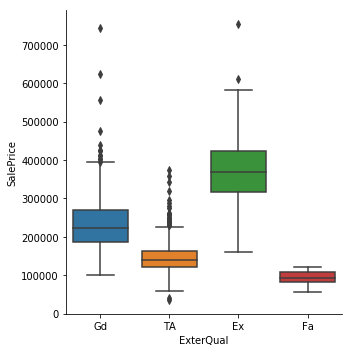

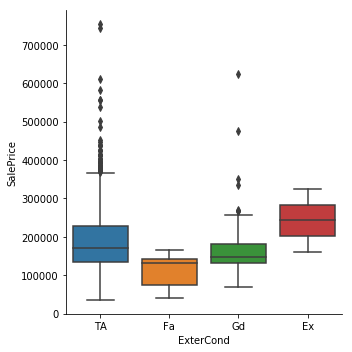

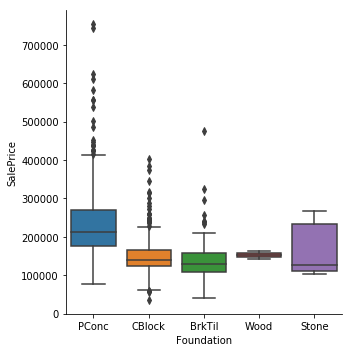

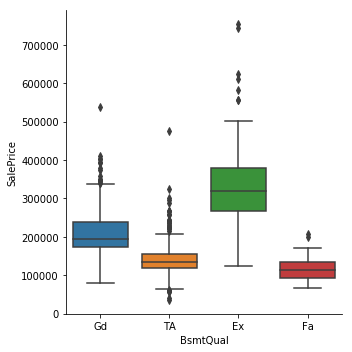

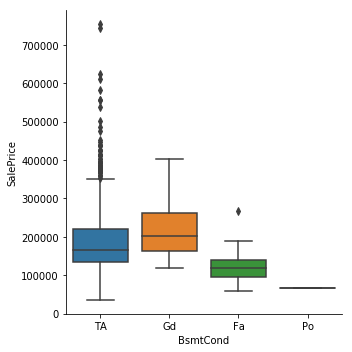

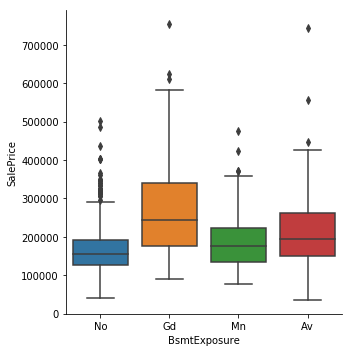

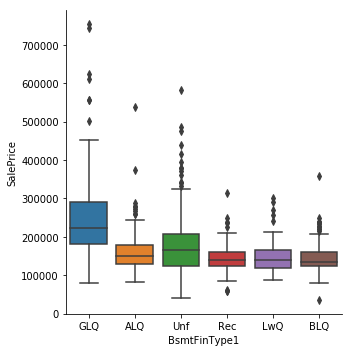

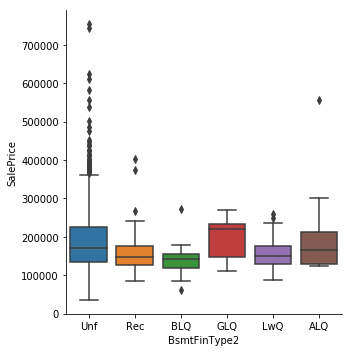

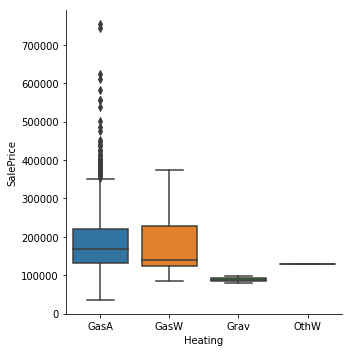

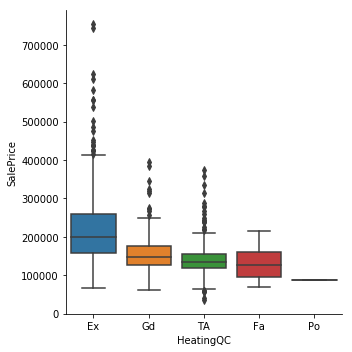

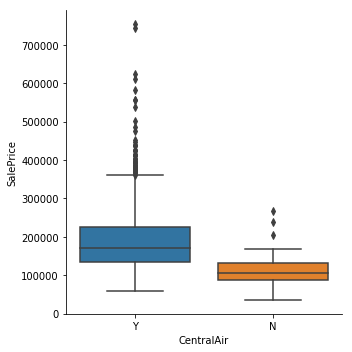

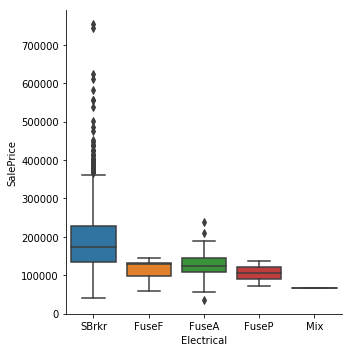

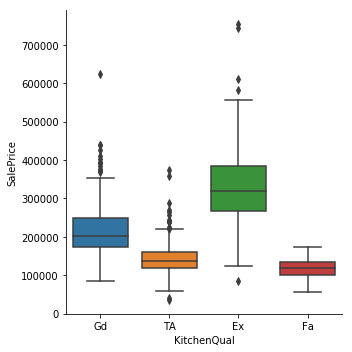

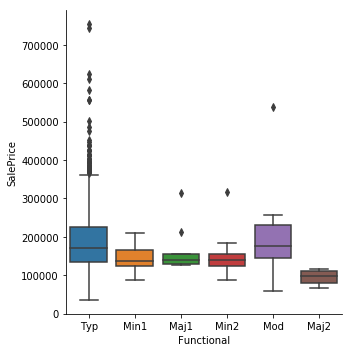

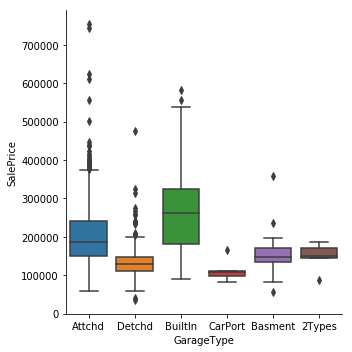

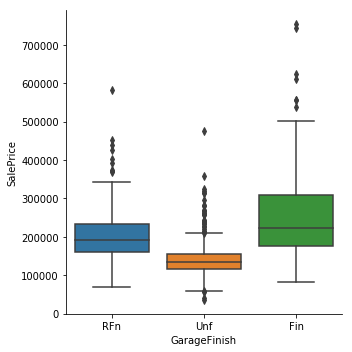

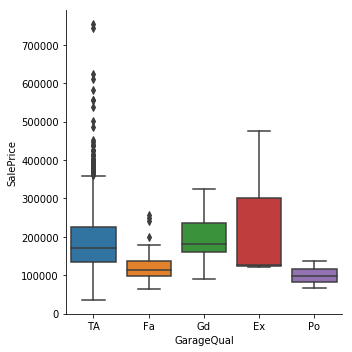

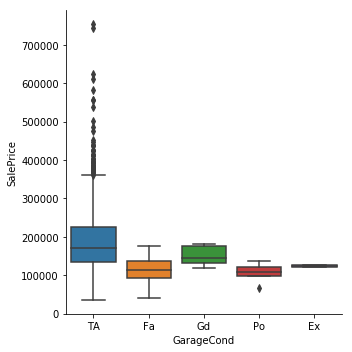

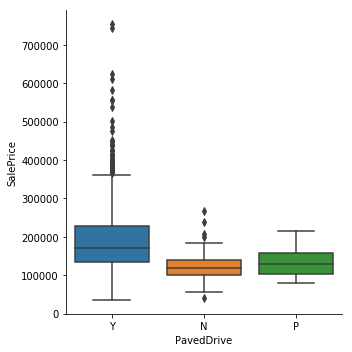

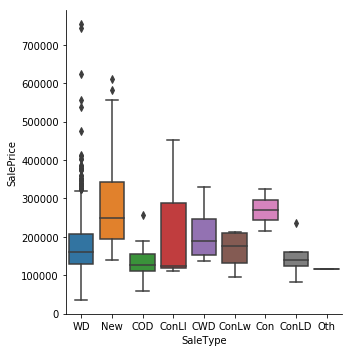

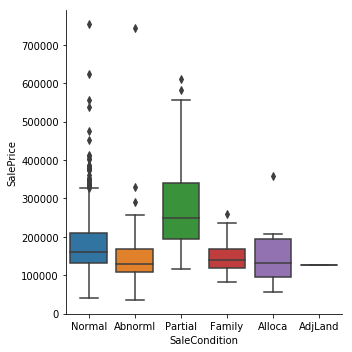

In [24]:
for col in cat_features:
    sns.catplot(x=col, y='SalePrice', kind="box", data=plot_data)
    plt.show()

### Detect interesting features for ML

In [4]:
# define by plots
columns = ['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'CentralAir', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'GarageArea']

In [5]:
# Replace NaN in LotFrontage as LR prediction
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[data.LotFrontage.notnull()][['LotArea']], data[data.LotFrontage.notnull()].LotFrontage)
def frontage(x):
    if pd.isna(x.loc['LotFrontage']):
        x.loc['LotFrontage'] = lr.predict(np.array(x.loc['LotArea']).reshape(-1, 1))[0]
    return x

data = data.apply(frontage, axis=1)
test_data = test_data.apply(frontage, axis=1)

In [9]:
test_data.KitchenQual = test_data.KitchenQual.fillna('Ex')
test_data.GarageArea = test_data.GarageArea.fillna(0)

In [10]:
dataset = data[columns]
test_data = test_data[columns]

In [25]:
dataset[dataset.columns[dataset.isna().any() == True]].isna().sum()

Series([], dtype: float64)

In [16]:
test_data[test_data.columns[test_data.isna().any() == True]].isna().sum()

Series([], dtype: float64)

In [15]:
test_data.GarageArea = test_data.GarageArea.fillna(0)
test_data.MSZoning = test_data.MSZoning.fillna('RL')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
dataset = pd.get_dummies(dataset)
test_data = pd.get_dummies(test_data)

In [ ]:
# year transform as now - year

In [26]:
# Split on train test sets
X = dataset.drop('Id', axis=1)
y = data.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Multi Linear regression

In [30]:
# Create ML model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Squared error:', np.sqrt(mean_squared_error(y_test, pred)))
print('Mean Absolute error:', mean_absolute_error(y_test, pred))

Mean Squared error: 35487.458702
Mean Absolute error: 22510.0411301


### SVM

In [33]:
from sklearn.svm import SVR

In [34]:
svr = SVR(degree=5)
svr.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
svr_pred = svr.predict(X_test)

In [37]:
print('Mean Squared error:', np.sqrt(mean_squared_error(y_test, svr_pred)))
print('Mean Absolute error:', mean_absolute_error(y_test, svr_pred))

Mean Squared error: 85444.5848072
Mean Absolute error: 58722.9834773


### Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
# poly_reg.fit(X_poly, y)

In [40]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.33, random_state=42)

In [41]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lr2_pred = lin_reg_2.predict(X_test1)

In [43]:
print('Mean Squared error:', np.sqrt(mean_squared_error(y_test1, lr2_pred)))
print('Mean Absolute error:', mean_absolute_error(y_test1, lr2_pred))

Mean Squared error: 64630.1054938
Mean Absolute error: 27384.6645883


 This results is worse than linear regresion!!!

### Random Forest regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
rf_pred = rf.predict(X_test)

In [47]:
print('Mean Squared error:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Mean Absolute error:', mean_absolute_error(y_test, rf_pred))

Mean Squared error: 35348.9533791
Mean Absolute error: 22747.2500692


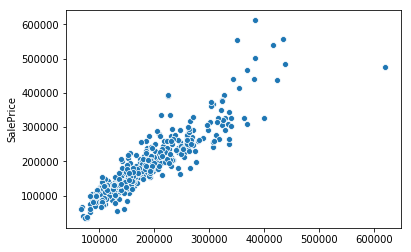

In [52]:
sns.scatterplot(x=rf_pred, y=y_test)

### Make prediction for the test data

In [48]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
pred = model.predict(test_data.drop('Id', axis=1))